In [1]:
from sklearn import tree
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from evaluacion_funciones import *

In [2]:
seed = 1

In [3]:
#######################################
#  PASO 1. CARGA DE CONJUNTOS DE DATOS.
datos = {
  #'IRIS': datasets.load_iris(),
  #'WINE': datasets.load_wine(),
  'BREAST-CANCER': datasets.load_breast_cancer()
}
#datos['IRIS'].data = datos['IRIS'].data[:,:2]
#datos['WINE'].data = datos['WINE'].data[:,:2]
#datos['BREAST-CANCER'].data = datos['BREAST-CANCER'].data[:,:2]

In [4]:
####################################################
# PASO 2. CONSTRUCCIÓN DE ALGORITMOS DE APRENDIZAJE.
algoritmos = {    
  'DT': tree.DecisionTreeClassifier(random_state=seed)
}

In [5]:
#######################################
# PASO 3. CONSTRUCCIÓN DE EXPERIMENTOS.
experimentos = {
  #'DT -> IRIS': (algoritmos['DT'], datos['IRIS']),
  #'DT -> WINE': (algoritmos['DT'], datos['WINE']),
  'DT -> BREAST-CANCER': (algoritmos['DT'], datos['BREAST-CANCER'])
}

In [14]:
###############################################
# PASO 4. DEFINICIÓN DE MÉTRICAS DE EVALUACIÓN.

from sklearn.metrics import roc_auc_score

def metrica_AUC(y_true, y_pred):
    # Calcula los puntos de la curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred) 
    # Devuelve el valor del área bajo esa curva
    return metrics.auc(fpr, tpr)

metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
                                  average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
                               average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro'),
  'AUC':    metrica_AUC,
  'AUC2':   lambda y_true, y_pred:
            roc_auc_score(y_true, y_pred)
}

In [15]:
#####################################################
# PASO 5. VALIDACIÓN Y OBTENCIÓN DE LAS PREDICCIONES.
y_pred = {}
for nombre, exp in experimentos.items():
    y_pred[nombre] = cross_val_predict(exp[0], exp[1].data, exp[1].target, cv=KFold(n_splits=10,shuffle=True,random_state=seed))

Matriz de confusión (DT -> BREAST-CANCER):
[[193  19]
 [ 16 341]]
Tabla de métricas (DT -> BREAST-CANCER):
              precision    recall  f1-score   support

           0      0.923     0.910     0.917       212
           1      0.947     0.955     0.951       357

    accuracy                          0.938       569
   macro avg      0.935     0.933     0.934       569
weighted avg      0.938     0.938     0.938       569



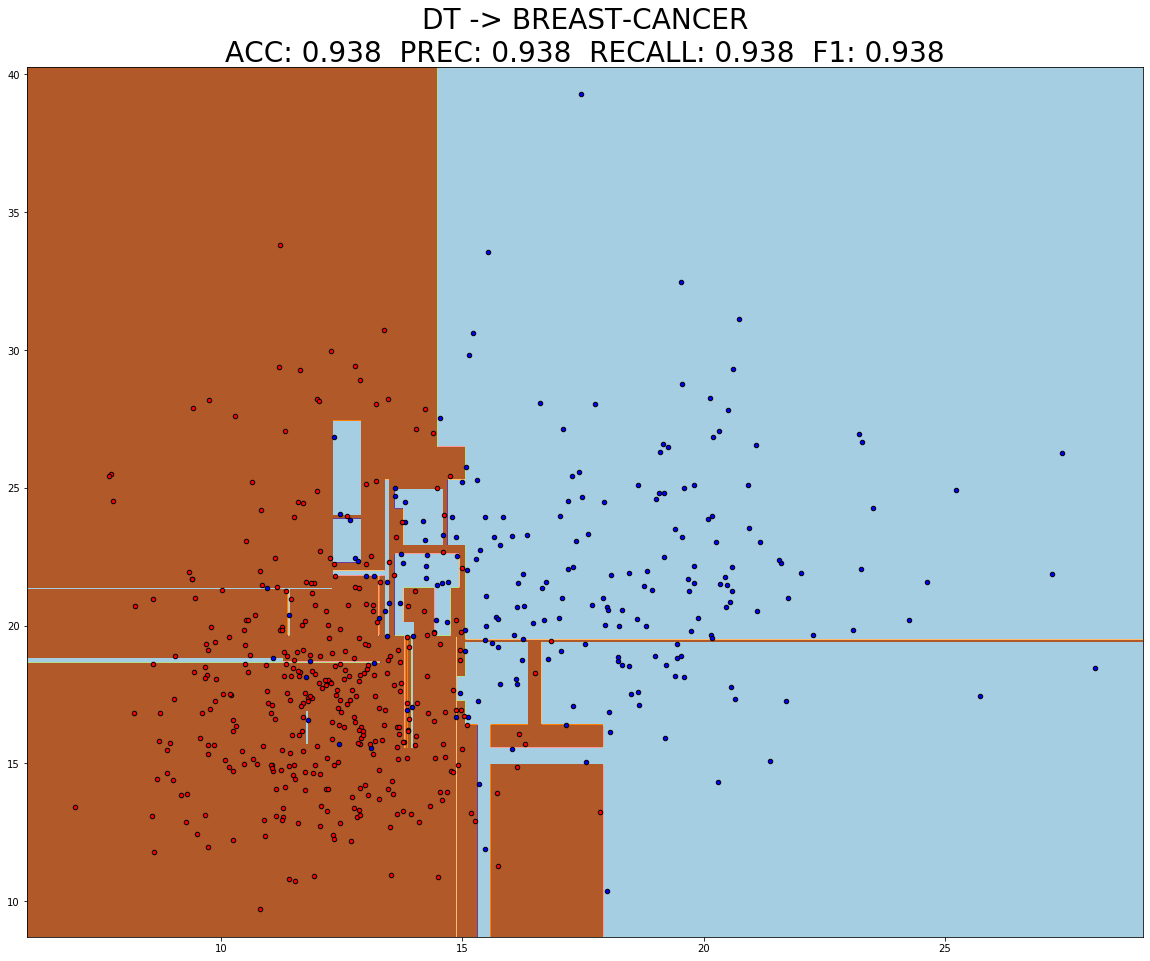

In [16]:
##################################################
# PASO 6. EVALUACIÓN Y PRESENTACIÓN DE RESULTADOS.
for nombre, exp in experimentos.items():
   # 6.1. Generación de métricas de evaluación
   #      (para generar tablas numéricas).
   eval = evaluacion(exp[1].target, y_pred[nombre], metricas)
   print("Matriz de confusión (%s):\n%s" % (nombre, metrics.confusion_matrix(exp[1].target, y_pred[nombre])))
   print("Tabla de métricas (%s):\n%s" % (nombre, metrics.classification_report(exp[1].target, y_pred[nombre], digits=3)))
   
   # 6.2. Creación de modelo de 2 atributos
   #      (para visualización 2D).
   modelo_completo_2d = exp[0].fit(exp[1].data[:,:2], exp[1].target)
   mapa_modelo_clasif_2d(exp[1].data[:,:2], exp[1].target, modelo_completo_2d, eval, nombre)

   # 6.3. Creación de modelo con todos los datos
   #      (para visualización árbol).
   if (nombre.startswith('DT')):
      modelo_completo = exp[0].fit(exp[1].data, exp[1].target)
      mostrar_modelo_arbol(modelo_completo, exp[1], nombre_archivo = nombre.replace('>',''))

In [17]:
eval

{'ACC': 0.9384885764499121,
 'PREC': 0.9384885764499121,
 'RECALL': 0.9384885764499121,
 'F1': 0.9384885764499121,
 'AUC': 0.932779715659849,
 'AUC2': 0.932779715659849}